In [1]:
#import packages
import pandas as pd
import datetime as dt
import os
from fnmatch import fnmatch
from os import listdir
import re
import geopandas as gpd
import fiona

In [2]:
#import shp with location of pollution stations
ObBad_buf = gpd.read_file('D:/DZEJNUS/NAUKA_20/Powietrze_GZM_i_okolice/GZMbufor_wszystkieStacje_wsp.shp')
ObBad_buf1 = pd.DataFrame(ObBad_buf) #create pandas dataFrame
ObBad_buf1.set_index('Kod stacji', inplace=True) #set column as index
ObBad_buf1

,Data uruch,Data zamkn,WGS84 ? N,WGS84 ? E,rok_uruch,rok_zamkn,L_lat_pom,geometry
Kod stacji,,,,,,,,
SlUstronSana,01.01.2012,None,49.719731,18.826722,2012,NaN,NaN,POINT (487513.382 205831.373)
SlUstroCies_sanat,01.03.1996,31.12.2009,49.724722,18.825000,1996,2009.0,13.0,POINT (487390.585 206386.390)
SlCiesMickie,01.01.2005,31.12.2019,49.738136,18.639069,2005,2019.0,14.0,POINT (474000.737 207925.101)
SlCieszCies_dojaz,01.01.2005,31.12.2009,49.751667,18.627500,2005,2009.0,4.0,POINT (473174.841 209433.087)
SlBielPartyz,01.01.2018,None,49.802075,19.048610,2018,NaN,NaN,POINT (503496.968 214970.357)
...,...,...,...,...,...,...,...,...
SlCzestCzes_arkra,01.01.1992,31.12.2009,50.817778,19.117500,1992,2009.0,17.0,POINT (508274.696 327878.464)
SkMalogCemen,01.01.2003,01.03.2009,50.827467,20.288276,2003,2009.0,6.0,POINT (590703.888 329739.582)
SlCzestoBacz,01.01.1992,None,50.836389,19.130111,1992,NaN,NaN,POINT (509159.157 329948.881)


In [3]:
#convert station names from dF index to list
Nkod_st = ObBad_buf1.index.to_list()
print(Nkod_st)

['SlUstronSana', 'SlUstroCies_sanat', 'SlCiesMickie', 'SlCieszCies_dojaz', 'SlBielPartyz', 'SlBielSterni', 'SlBielKossak', 'MpAndrycWSSEKrak1801', 'MpKalZebRyneMOB', 'MpWadowiWIOSPska1807', 'MpWadowiWIOSPSka1805', 'MpKetyWyspiaMOB', 'MpWadowiWIOSTeat1802', 'SlGodGliniki', 'SlJastrJast_harce', 'MpBrzeszKosc', 'MpSkawOsOgro', 'SlPszczBoged', 'MpKrakowWSSEKapi6108', 'SlWodziWodz_bogum', 'SlWodzGalczy', 'MpKrakBujaka', 'MpKrakTelime', 'MpKaszowLisz', 'SlZorySikors', 'SlZorySikor2', 'MpOswiecBema', 'MpOswiecWIOSSnia1304', 'MpOswiecWSSEWiez1301', 'MpOswiecWIOSSnia1302', 'MpKrakowWSSERPod6113', 'SlZorymZory_wojsk', 'MpKrakDietla', 'MpKrakAlKras', 'SlRacibRaci_studz', 'MpKrakBulwar', 'MpKrakZloRog', 'MpKrakowWIOSPrad6115', 'MpKrakowWSSEPrad6102', 'SlRybniRybn_szafr', 'MpKrakOsPias', 'SlTychyTolst', 'MpKrakWadow', 'SlRybniBorki', 'MpChrzanWSSEGrzy0301', 'MpChrzaPlTysMOB', 'MpTrzebOsZWM', 'MpTrzebiWIOSPils0303', 'SlCzerKopaln', 'OpGlubRatusz', 'OpGlubKochan', 'SlJaworJawo_poczt', 'SlKnurJedNar',

In [4]:
#read file with stations metadata
MetadaneStacji = pd.read_excel('D:/DZEJNUS/NAUKA_20/Powietrze_GZM_i_okolice/danePowietrze/GIOS/giosStacjeMetadane_wer20190813.xlsx', index_col = 1)
#select only stations from the study area
ObBad_buf_Mds = MetadaneStacji[MetadaneStacji.index.isin(Nkod_st)]

#rename columns
ObBad_buf_Mds.rename(columns={'Stary Kod stacji':'StaryKodstacji', 'WGS84 φ N':'Lat', 'WGS84 λ E':'Long'}, inplace=True)
#export "old station names" to list
Skod_st = ObBad_buf_Mds['StaryKodstacji'].to_list()
print(Skod_st)

['MpAndrycWSSEKrak1801', 'MpBrzeszKosc', 'MpBukownWIOSKole1206', 'MpChrzanWSSEGrzy0301', 'MpChrzaPlTysMOB', 'MpKalZebRyneMOB', 'MpKaszowLisz', 'MpKetyWIOSWysp1304', 'MpKrakowWIOSAKra6117', 'MpKrakowWIOSBuja6119', 'MpKrakowWIOSBulw6118', 'MpKrakDietla', 'MpKrakOsPias', 'MpKrakowWIOSPrad6115', 'MpKrakowWSSEKapi6108', 'MpKrakowWSSEPrad6102', 'MpKrakowWSSERPod6113', 'MpKrakTelime', 'MpKrakWadow', 'MpKrakZloRog', 'MpMiechoWIOSKono0802', 'MpMiechoWIOSKsSk0801', 'MpOlkuszWIOSNull1205', 'MpOswiecBema', 'MpOswiecWIOSSnia1302', 'MpOswiecWIOSSnia1304', 'MpOswiecWSSEWiez1301', 'MpSkawinWIOSOsie0606', 'MpSlomniWIOSWoln0611', 'MpTrzebiWIOSPils0303', 'MpTrzebiWIOSZWM0305', 'MpWadowiWIOSPSka1805', 'MpWadowiWIOSPska1807', 'MpWadowiWIOSTeat1802', 'OpGlub1pyl', 'OpGlubRatusz', 'OpGora12728', 'OpJanusz12394', 'OpKkozle1a', 'OpKkozle243', 'OpKkozle61', 'OpKkozleSP10', 'OpKkozleSP3', 'OpKkozleSP7', 'OpOlesno3pyl', 'OpOlesno4a', 'OpOpole244', 'OpOpole246', 'OpOpole45', 'OpOpole45p', 'OpOpoleKoszy', 'OpOpole3

C:\Miniconda\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
#create dictionary: "old station name" : "new station name"
slownik_SNKod = pd.Series(ObBad_buf_Mds.index.values,index=ObBad_buf_Mds.StaryKodstacji).to_dict()
slownik_SNKod

{'MpAndrycWSSEKrak1801': 'MpAndrycWSSEKrak1801',
 'MpBrzeszKosc': 'MpBrzeszKosc',
 'MpBukownWIOSKole1206': 'MpBukowKolejMOB',
 'MpChrzanWSSEGrzy0301': 'MpChrzanWSSEGrzy0301',
 'MpChrzaPlTysMOB': 'MpChrzaPlTysMOB',
 'MpKalZebRyneMOB': 'MpKalZebRyneMOB',
 'MpKaszowLisz': 'MpKaszowLisz',
 'MpKetyWIOSWysp1304': 'MpKetyWyspiaMOB',
 'MpKrakowWIOSAKra6117': 'MpKrakAlKras',
 'MpKrakowWIOSBuja6119': 'MpKrakBujaka',
 'MpKrakowWIOSBulw6118': 'MpKrakBulwar',
 'MpKrakDietla': 'MpKrakDietla',
 'MpKrakOsPias': 'MpKrakOsPias',
 'MpKrakowWIOSPrad6115': 'MpKrakowWIOSPrad6115',
 'MpKrakowWSSEKapi6108': 'MpKrakowWSSEKapi6108',
 'MpKrakowWSSEPrad6102': 'MpKrakowWSSEPrad6102',
 'MpKrakowWSSERPod6113': 'MpKrakowWSSERPod6113',
 'MpKrakTelime': 'MpKrakTelime',
 'MpKrakWadow': 'MpKrakWadow',
 'MpKrakZloRog': 'MpKrakZloRog',
 'MpMiechoWIOSKono0802': 'MpMiechoWIOSKono0802',
 'MpMiechoWIOSKsSk0801': 'MpMiechoWIOSKsSk0801',
 'MpOlkuszWIOSNull1205': 'MpOlkuFrNull',
 'MpOswiecBema': 'MpOswiecBema',
 'MpOswiecWIOSSnia

In [6]:
ObBad_buf_Mds

,Nr,Kod międzynarodowy,Nazwa stacji,StaryKodstacji,Data uruchomienia,Data zamknięcia,Status,Typ stacji,Typ obszaru,Rodzaj stacji,Województwo,Miejscowość,Ulica,Lat,Long
Kod stacji,,,,,,,,,,,,,,,
MpAndrycWSSEKrak1801,392,NaN,Andrychów Krakowska,MpAndrycWSSEKrak1801,2001-01-01,2009-12-31,nieaktywny,tło,miejski,w budynku,MAŁOPOLSKIE,Andrychów,ul. Krakowska 86,49.853333,19.340556
MpBrzeszKosc,399,PL0668A,"Brzeszcze, ul. Kościelna",MpBrzeszKosc,2017-01-01,2018-01-17,nieaktywny,tło,miejski,kontenerowa stacjonarna,MAŁOPOLSKIE,Brzeszcze,Kościelna,49.966667,19.146061
MpBukowKolejMOB,400,PL0612A,"Bukowno, ul. Kolejowa",MpBukownWIOSKole1206,2015-01-01,2015-12-31,nieaktywny,tło,miejski,mobilna,MAŁOPOLSKIE,Bukowno,ul. Kolejowa,50.266239,19.462286
MpChrzanWSSEGrzy0301,401,PL0303A,Chrzanów Grzybowskiego,MpChrzanWSSEGrzy0301,2001-01-01,2009-12-31,nieaktywny,tło,miejski,w budynku,MAŁOPOLSKIE,Chrzanów,ul. Grzybowskiego 7,50.136944,19.397222
MpChrzaPlTysMOB,402,PL0637A,"Chrzanów, Pl. Tysiąclecia",MpChrzaPlTysMOB,2016-01-01,2016-12-31,nieaktywny,tło,miejski,mobilna,MAŁOPOLSKIE,Chrzanów,Pl. Tysiąclecia,50.144028,19.406556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SlZawSkloCur,867,PL0293A,"Zawiercie, ul. M. Skłodowskiej-Curie 16",SlZawieZawi_zawie,2006-07-01,2018-12-31,nieaktywny,tło,miejski,kontenerowa stacjonarna,ŚLĄSKIE,Zawiercie,ul. Skłodowskiej-Curie 16,50.479540,19.433010
SlZlotPotLes,868,PL0243A,"Złoty Potok, Leśniczówka",SlZlotyJano_lesni,2005-01-01,NaT,aktywny,tło,pozamiejski,kontenerowa stacjonarna,ŚLĄSKIE,Złoty Potok,Leśniczówka Kamienna Góra,50.710889,19.458797
SlZorymZory_wojsk,869,PL0449A,Żory_wojska-WSSE,SlZorymZory_wojsk,2005-01-01,2009-12-31,nieaktywny,tło,miejski,kontenerowa stacjonarna,ŚLĄSKIE,Żory,ul. Wojska Polskiego 25,50.045278,18.684444


In [7]:
ObBad_Buf_Mds_wsp = ObBad_buf_Mds[['StaryKodstacji', 'Lat', 'Long']] #subset of dataFrame - select by column names
ObBad_Buf_Mds_wsp.set_index('StaryKodstacji', inplace=True) #set index of new dataFrame
s = ObBad_Buf_Mds_wsp.index.to_series() #convert dF index to series
ObBad_Buf_Mds_wsp.index = s.map(slownik_SNKod).fillna(s) #change "new station names" into "old station names"
ObBad_Buf_Mds_wsp

,Lat,Long
StaryKodstacji,,
MpAndrycWSSEKrak1801,49.853333,19.340556
MpBrzeszKosc,49.966667,19.146061
MpBukowKolejMOB,50.266239,19.462286
MpChrzanWSSEGrzy0301,50.136944,19.397222
MpChrzaPlTysMOB,50.144028,19.406556
...,...,...
SlZawSkloCur,50.479540,19.433010
SlZlotPotLes,50.710889,19.458797
SlZorymZory_wojsk,50.045278,18.684444


In [8]:
# determination of annual average, maximum and minimum NO2 for each station

directory = 'D:/DZEJNUS/NAUKA_20/Powietrze_GZM_i_okolice/danePowietrze/GIOS' #set directory
pattern_NO2 = "*NO2_1g.xlsx" #set pattern of filename

#create empty dataFrames and empty lists - to save results
Sr_NO2_Sk = pd.DataFrame()
Sr_NO2_Nk = pd.DataFrame()
Max_NO2_Sk = pd.DataFrame()
Max_NO2_Nk = pd.DataFrame()
Min_NO2_Sk = pd.DataFrame()
Min_NO2_Nk = pd.DataFrame()
NO2_2000_2018 = pd.DataFrame()
L_Sr_NO2_Sk = []
L_Sr_NO2_Nk = []
L_Max_NO2_Sk = []
L_Max_NO2_Nk = []
L_Min_NO2_Sk = []
L_Min_NO2_Nk = []


for path, subdirs, files in os.walk(directory):  #loop through each file in directory
    for name in files:                           #loop through file names
        if fnmatch(name, pattern_NO2):      ##if file matches a pattern, then (pattern = *NO2_1g)
            rok = str(name[0:4])       #extract year number from filename
            for plik in rok:           #for file in year
                    #differences in how files are processed for each year are due to different file structures (especially first lines)
                    #and due to usage of "old station names" till 2015 and "new station names" after 2015
                if rok < str(2015):     #if year is lower than 2015
                    pth_Sk = os.path.join(directory, 'gios' + rok, name)  #path to read xlsx file, set row no. 0 as header
                    ark_Sk = pd.read_excel(str(pth_Sk), header = 0) #read xlsx file
                    ark_Sk.drop(ark_Sk.head(2).index, inplace=True) #drop first TWO lines of df
                    Wybr_ark_Sk = ark_Sk[ark_Sk.columns & Skod_st]  #select stations from the study area (using "old station names")
                    #change column datatype to float
                    Wybr_ark_Sk.loc[:, Wybr_ark_Sk.columns] = Wybr_ark_Sk.loc[:, Wybr_ark_Sk.columns].replace(',','.', regex=True).astype(float)
                    
                    srednia_WA_Sk = pd.DataFrame(Wybr_ark_Sk.mean())  #compute annual mean
                    srednia_WA_Sk.rename(columns = {0:'srNO2_'+str(rok)}, inplace=True)  #rename computed columns
                    srednia_WA_Sk.index.name = 'KodStacji' #set index
                    L_Sr_NO2_Sk.append(srednia_WA_Sk) #append data to list
                    
                    max_WA_Sk = pd.DataFrame(Wybr_ark_Sk.max()) #compute annual max
                    max_WA_Sk.rename(columns = {0:'mxNO2_'+str(rok)}, inplace=True) #rename computed columns
                    max_WA_Sk.index.name = 'KodStacji' #set index
                    L_Max_NO2_Sk.append(max_WA_Sk) #append data to list
                    
                    min_WA_Sk = pd.DataFrame(Wybr_ark_Sk.min())  #compute annual min
                    min_WA_Sk.rename(columns = {0:'mnNO2_'+str(rok)}, inplace=True)  #and so on
                    min_WA_Sk.index.name = 'KodStacji'
                    L_Min_NO2_Sk.append(min_WA_Sk)
                    break
                    
                if rok == str(2015):   #if year == 2015
                    pth_Nk = os.path.join(directory, 'gios' + rok, name)
                    ark_Nk = pd.read_excel(str(pth_Nk), header = 0)  #read xlsx, set row no. 0 as header
                    ark_Nk.drop(ark_Nk.head(2).index, inplace=True)  #drop TWO first lines
                    Wybr_ark_Nk = ark_Nk[ark_Nk.columns & Nkod_st]   #select stations from the study area (using "new station names")
                    Wybr_ark_Nk.loc[:, Wybr_ark_Nk.columns] = Wybr_ark_Nk.loc[:, Wybr_ark_Nk.columns].replace(',','.', regex=True).astype(float)
                    
                    srednia_WA_Sk = pd.DataFrame(Wybr_ark_Sk.mean())   #and so on
                    srednia_WA_Sk.rename(columns = {0:'srNO2_'+str(rok)}, inplace=True)
                    srednia_WA_Sk.index.name = 'KodStacji'
                    L_Sr_NO2_Sk.append(srednia_WA_Sk)
                    
                    max_WA_Sk = pd.DataFrame(Wybr_ark_Sk.max())
                    max_WA_Sk.rename(columns = {0:'mxNO2_'+str(rok)}, inplace=True)
                    max_WA_Sk.index.name = 'KodStacji'
                    L_Max_NO2_Sk.append(max_WA_Sk)
                    
                    min_WA_Sk = pd.DataFrame(Wybr_ark_Sk.min())
                    min_WA_Sk.rename(columns = {0:'mnNO2_'+str(rok)}, inplace=True)
                    min_WA_Sk.index.name = 'KodStacji'
                    L_Min_NO2_Sk.append(min_WA_Sk)
                    break
                    
                if rok > str(2015):  #if year is greater than 2015
                    pth_Nk = os.path.join(directory, 'gios' + rok, name)
                    ark_Nk = pd.read_excel(str(pth_Nk), header = 1)   #read xlsx, set row no. 1 as header
                    ark_Nk.drop(ark_Nk.head(4).index, inplace=True)   #drop first FOUR lines of dF
                    Wybr_ark_Nk = ark_Nk[ark_Nk.columns & Nkod_st]    #select stations from the study area (using "new station names")
                    Wybr_ark_Nk.loc[:, Wybr_ark_Nk.columns] = Wybr_ark_Nk.loc[:, Wybr_ark_Nk.columns].replace(',','.', regex=True).astype(float)
                    
                    srednia_WA_Nk = pd.DataFrame(Wybr_ark_Nk.mean())   #and so on
                    srednia_WA_Nk.rename(columns = {0:'srNO2_'+str(rok)}, inplace=True)
                    srednia_WA_Nk.index.name = 'KodStacji'
                    L_Sr_NO2_Nk.append(srednia_WA_Nk)
                    
                    max_WA_Nk = pd.DataFrame(Wybr_ark_Nk.max())
                    max_WA_Nk.rename(columns = {0:'mxNO2_'+str(rok)}, inplace=True)
                    max_WA_Nk.index.name = 'KodStacji'
                    L_Max_NO2_Nk.append(max_WA_Nk)
                    
                    min_WA_Nk = pd.DataFrame(Wybr_ark_Nk.min())
                    min_WA_Nk.rename(columns = {0:'mnNO2_'+str(rok)}, inplace=True)
                    min_WA_Nk.index.name = 'KodStacji'
                    L_Min_NO2_Nk.append(min_WA_Nk)
                    break

C:\Miniconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Miniconda\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Miniconda\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Miniconda\lib\site-packages\ipykernel_launcher.py:76: SettingWithCopyWarning: 
A valu

In [9]:
#concatenate computed mean values to dataFrame
SredniaWyn_NO2_Sk = pd.concat(L_Sr_NO2_Sk, join='outer', axis=1, sort = True)#.fillna('BD')
SredniaWyn_NO2_Sk.index.name = 'KodStacji'
s = SredniaWyn_NO2_Sk.index.to_series()
SredniaWyn_NO2_Sk.index = s.map(slownik_SNKod).fillna(s)

SredniaWyn_NO2_Nk = pd.concat(L_Sr_NO2_Nk, join='outer', axis=1, sort = True) #.fillna('BD')
SredniaWyn_NO2_Nk.index.name = 'KodStacji'
NO2_sr2000_2018 = SredniaWyn_NO2_Sk.merge(SredniaWyn_NO2_Nk, how='outer', on = 'KodStacji', sort = True)

#concatenate computed max values to dataFrame
MaxWyn_NO2_Sk = pd.concat(L_Max_NO2_Sk, join='outer', axis=1, sort = True)#.fillna('BD')
MaxWyn_NO2_Sk.index.name = 'KodStacji'
s = MaxWyn_NO2_Sk.index.to_series()
MaxWyn_NO2_Sk.index = s.map(slownik_SNKod).fillna(s)

MaxWyn_NO2_Nk = pd.concat(L_Max_NO2_Nk, join='outer', axis=1, sort = True) #.fillna('BD')
MaxWyn_NO2_Nk.index.name = 'KodStacji'
NO2_mx2000_2018 = MaxWyn_NO2_Sk.merge(MaxWyn_NO2_Nk, how='outer', on = 'KodStacji', sort = True)

#concatenate computed min values to dataFrame
MinWyn_NO2_Sk = pd.concat(L_Min_NO2_Sk, join='outer', axis=1, sort = True)#.fillna('BD')
MinWyn_NO2_Sk.index.name = 'KodStacji'
s = MinWyn_NO2_Sk.index.to_series()
MinWyn_NO2_Sk.index = s.map(slownik_SNKod).fillna(s)

MinWyn_NO2_Nk = pd.concat(L_Min_NO2_Nk, join='outer', axis=1, sort = True) #.fillna('BD')
MinWyn_NO2_Nk.index.name = 'KodStacji'
NO2_mn2000_2018 = MinWyn_NO2_Sk.merge(MinWyn_NO2_Nk, how='outer', on = 'KodStacji', sort = True)

#concatenate all computed statistics into single dataFrame
from functools import reduce
l = [NO2_sr2000_2018, NO2_mx2000_2018, NO2_mn2000_2018]
NO2_2000_2018 = reduce(lambda left,right: pd.merge(left,right, how = 'outer', on='KodStacji', sort = True), l)
NO2_2000_2018

,srNO2_2000,srNO2_2001,srNO2_2002,srNO2_2003,srNO2_2004,srNO2_2005,srNO2_2006,srNO2_2007,srNO2_2008,srNO2_2009,...,mnNO2_2009,mnNO2_2010,mnNO2_2011,mnNO2_2012,mnNO2_2013,mnNO2_2014,mnNO2_2015,mnNO2_2016,mnNO2_2017,mnNO2_2018
KodStacji,,,,,,,,,,,,,,,,,,,,,
MpKaszowLisz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.99530,1.31647
MpKrakAlKras,73.485233,65.895224,66.420776,66.447151,66.306852,62.929765,66.426230,60.864043,64.675802,70.021125,...,11.0,9.0,11.0,8.0,9.0,5.00000,5.00000,5.00466,4.50223,5.33448
MpKrakBujaka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,3.0,2.0,1.0,1.00000,1.00000,2.31086,1.33540,1.57499
MpKrakBulwar,31.692117,30.901762,30.146095,32.095615,29.595657,28.321339,33.319039,30.084594,30.487866,30.709165,...,2.0,2.0,3.0,3.0,2.0,2.00000,2.00000,1.75320,2.12453,2.63313
MpKrakDietla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.46718,5.51931,6.01643
MpKrakowWIOSPrad6115,29.219405,30.914202,35.886805,35.500854,34.843017,36.489696,38.138313,33.162700,31.786557,33.384900,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MpOlkuFrNull,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.847793,23.809815,...,3.0,2.0,3.0,4.0,4.0,2.00000,2.00000,NaN,NaN,NaN
MpSkawOsOgro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.336402,25.475136,24.230933,...,2.0,2.0,2.0,2.0,1.0,1.00000,1.00000,1.08772,1.47755,1.54030
MpTrzebOsZWM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,1.0,1.0,3.00000,3.00000,1.29188,1.00000,1.06287


In [10]:
os.chdir('D:/DZEJNUS/NAUKA_20/Powietrze_GZM_i_okolice/danePowietrze/GIOS') #set directory
#process data from dataFrame to shapefile
NO2_2000_2018_wsp = NO2_2000_2018.merge(ObBad_Buf_Mds_wsp, left_index=True, right_index=True) #add lat lon data
NO2_2000_2018_wsp_gdf = gpd.GeoDataFrame(
    NO2_2000_2018_wsp, geometry=gpd.points_from_xy(NO2_2000_2018_wsp.Long, NO2_2000_2018_wsp.Lat)) #create geodataframe
NO2_2000_2018_wsp_gdf.crs = {'init' :'epsg:4326'} #set coordinate system EPSG 4326
NO2_2000_2018_gdf_pwg92  = NO2_2000_2018_wsp_gdf.to_crs({'init': 'epsg:2180'})  #export to polish crs EPSG 2180
NO2_2000_2018_gdf_pwg92.to_file(driver = 'ESRI Shapefile', filename = "GZMb_NO2_2000_2018.shp") #export to shapefile

C:\Miniconda\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [11]:
# determine the annual average, maximum and minimum of PM10 for each station (similar as in case of NO2)

directory = 'D:/DZEJNUS/NAUKA_20/Powietrze_GZM_i_okolice/danePowietrze/GIOS'
pattern_PM10 = "*PM10_1g.xlsx"
Sr_PM10_Sk = pd.DataFrame()
Sr_PM10_Nk = pd.DataFrame()
Max_PM10_Sk = pd.DataFrame()
Max_PM10_Nk = pd.DataFrame()
Min_PM10_Sk = pd.DataFrame()
Min_PM10_Nk = pd.DataFrame()
PM10_2000_2018 = pd.DataFrame()
L_Sr_PM10_Sk = []
L_Sr_PM10_Nk = []
L_Max_PM10_Sk = []
L_Max_PM10_Nk = []
L_Min_PM10_Sk = []
L_Min_PM10_Nk = []


for path, subdirs, files in os.walk(directory):  #pętla przelatuje przez wszystkie pliki w directory
    for name in files:
        if fnmatch(name, pattern_PM10):      #jeśli plik pasuje do wzoru, to (pattern = *PM10_1g)
            rok = str(name[0:4])       #wyciągnięcie nr lat z nazw plików   
            for plik in rok:
                if rok < str(2015):
                    pth_Sk = os.path.join(directory, 'gios' + rok, name)
                    ark_Sk = pd.read_excel(str(pth_Sk), header = 0)
                    ark_Sk.drop(ark_Sk.head(2).index, inplace=True)
                    Wybr_ark_Sk = ark_Sk[ark_Sk.columns & Skod_st]
                    Wybr_ark_Sk.loc[:, Wybr_ark_Sk.columns] = Wybr_ark_Sk.loc[:, Wybr_ark_Sk.columns].replace(',','.', regex=True).astype(float)
                    
                    srednia_WA_Sk = pd.DataFrame(Wybr_ark_Sk.mean())
                    srednia_WA_Sk.rename(columns = {0:'srPM1_'+str(rok)}, inplace=True)
                    srednia_WA_Sk.index.name = 'KodStacji'
                    L_Sr_PM10_Sk.append(srednia_WA_Sk)
                    
                    max_WA_Sk = pd.DataFrame(Wybr_ark_Sk.max())
                    max_WA_Sk.rename(columns = {0:'mxPM1_'+str(rok)}, inplace=True)
                    max_WA_Sk.index.name = 'KodStacji'
                    L_Max_PM10_Sk.append(max_WA_Sk)
                    
                    min_WA_Sk = pd.DataFrame(Wybr_ark_Sk.min())
                    min_WA_Sk.rename(columns = {0:'mnPM1_'+str(rok)}, inplace=True)
                    min_WA_Sk.index.name = 'KodStacji'
                    L_Min_PM10_Sk.append(min_WA_Sk)
                    break
                    
                if rok == str(2015):
                    pth_Nk = os.path.join(directory, 'gios' + rok, name)
                    ark_Nk = pd.read_excel(str(pth_Nk), header = 0)
                    ark_Nk.drop(ark_Nk.head(2).index, inplace=True)
                    Wybr_ark_Nk = ark_Nk[ark_Nk.columns & Nkod_st]
                    Wybr_ark_Nk.loc[:, Wybr_ark_Nk.columns] = Wybr_ark_Nk.loc[:, Wybr_ark_Nk.columns].replace(',','.', regex=True).astype(float)
                    
                    srednia_WA_Sk = pd.DataFrame(Wybr_ark_Sk.mean())
                    srednia_WA_Sk.rename(columns = {0:'srPM1_'+str(rok)}, inplace=True)
                    srednia_WA_Sk.index.name = 'KodStacji'
                    L_Sr_PM10_Sk.append(srednia_WA_Sk)
                    
                    max_WA_Sk = pd.DataFrame(Wybr_ark_Sk.max())
                    max_WA_Sk.rename(columns = {0:'mxPM1_'+str(rok)}, inplace=True)
                    max_WA_Sk.index.name = 'KodStacji'
                    L_Max_PM10_Sk.append(max_WA_Sk)
                    
                    min_WA_Sk = pd.DataFrame(Wybr_ark_Sk.min())
                    min_WA_Sk.rename(columns = {0:'mnPM1_'+str(rok)}, inplace=True)
                    min_WA_Sk.index.name = 'KodStacji'
                    L_Min_PM10_Sk.append(min_WA_Sk)
                    break
                    
                if rok > str(2015):
                    pth_Nk = os.path.join(directory, 'gios' + rok, name)
                    ark_Nk = pd.read_excel(str(pth_Nk), header = 1)
                    ark_Nk.drop(ark_Nk.head(4).index, inplace=True)
                    Wybr_ark_Nk = ark_Nk[ark_Nk.columns & Nkod_st]
                    Wybr_ark_Nk.loc[:, Wybr_ark_Nk.columns] = Wybr_ark_Nk.loc[:, Wybr_ark_Nk.columns].replace(',','.', regex=True).astype(float)
                    
                    srednia_WA_Nk = pd.DataFrame(Wybr_ark_Nk.mean())
                    srednia_WA_Nk.rename(columns = {0:'srPM1_'+str(rok)}, inplace=True)
                    srednia_WA_Nk.index.name = 'KodStacji'
                    L_Sr_PM10_Nk.append(srednia_WA_Nk)
                    
                    max_WA_Nk = pd.DataFrame(Wybr_ark_Nk.max())
                    max_WA_Nk.rename(columns = {0:'mxPM1_'+str(rok)}, inplace=True)
                    max_WA_Nk.index.name = 'KodStacji'
                    L_Max_PM10_Nk.append(max_WA_Nk)
                    
                    min_WA_Nk = pd.DataFrame(Wybr_ark_Nk.min())
                    min_WA_Nk.rename(columns = {0:'mnPM1_'+str(rok)}, inplace=True)
                    min_WA_Nk.index.name = 'KodStacji'
                    L_Min_PM10_Nk.append(min_WA_Nk)
                    break
                    
#złączenie średniej do DF
SredniaWyn_PM10_Sk = pd.concat(L_Sr_PM10_Sk, join='outer', axis=1, sort = True)#.fillna('BD')
SredniaWyn_PM10_Sk.index.name = 'KodStacji'
s = SredniaWyn_PM10_Sk.index.to_series()
SredniaWyn_PM10_Sk.index = s.map(slownik_SNKod).fillna(s)

SredniaWyn_PM10_Nk = pd.concat(L_Sr_PM10_Nk, join='outer', axis=1, sort = True) #.fillna('BD')
SredniaWyn_PM10_Nk.index.name = 'KodStacji'
PM10_sr2000_2018 = SredniaWyn_PM10_Sk.merge(SredniaWyn_PM10_Nk, how='outer', on = 'KodStacji', sort = True)

#złączenie max do DF
MaxWyn_PM10_Sk = pd.concat(L_Max_PM10_Sk, join='outer', axis=1, sort = True)#.fillna('BD')
MaxWyn_PM10_Sk.index.name = 'KodStacji'
s = MaxWyn_PM10_Sk.index.to_series()
MaxWyn_PM10_Sk.index = s.map(slownik_SNKod).fillna(s)

MaxWyn_PM10_Nk = pd.concat(L_Max_PM10_Nk, join='outer', axis=1, sort = True) #.fillna('BD')
MaxWyn_PM10_Nk.index.name = 'KodStacji'
PM10_mx2000_2018 = MaxWyn_PM10_Sk.merge(MaxWyn_PM10_Nk, how='outer', on = 'KodStacji', sort = True)

#złączenie min do DF
MinWyn_PM10_Sk = pd.concat(L_Min_PM10_Sk, join='outer', axis=1, sort = True)#.fillna('BD')
MinWyn_PM10_Sk.index.name = 'KodStacji'
s = MinWyn_PM10_Sk.index.to_series()
MinWyn_PM10_Sk.index = s.map(slownik_SNKod).fillna(s)

MinWyn_PM10_Nk = pd.concat(L_Min_PM10_Nk, join='outer', axis=1, sort = True) #.fillna('BD')
MinWyn_PM10_Nk.index.name = 'KodStacji'
PM10_mn2000_2018 = MinWyn_PM10_Sk.merge(MinWyn_PM10_Nk, how='outer', on = 'KodStacji', sort = True)

#złączenie wszystkich statystyk w jedną DF
from functools import reduce
l = [PM10_sr2000_2018, PM10_mx2000_2018, PM10_mn2000_2018]
PM10_2000_2018 = reduce(lambda left,right: pd.merge(left,right, how = 'outer', on='KodStacji', sort = True), l)
PM10_2000_2018

C:\Miniconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Miniconda\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Miniconda\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Miniconda\lib\site-packages\ipykernel_launcher.py:76: SettingWithCopyWarning: 
A valu

,srPM1_2003,srPM1_2004,srPM1_2005,srPM1_2006,srPM1_2007,srPM1_2008,srPM1_2009,srPM1_2010,srPM1_2011,srPM1_2012,...,mnPM1_2009,mnPM1_2010,mnPM1_2011,mnPM1_2012,mnPM1_2013,mnPM1_2014,mnPM1_2015,mnPM1_2016,mnPM1_2017,mnPM1_2018
KodStacji,,,,,,,,,,,,,,,,,,,,,
MpKrakAlKras,80.636121,70.574429,88.032295,95.413043,80.859978,80.861845,78.507271,79.002748,76.633458,65.834283,...,9.0,3.0,3.0,4.0,6.0,6.00,6.00,3.00000,2.88502,3.51373
MpKrakBujaka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.354409,54.322153,51.970347,...,NaN,3.0,3.0,3.0,3.0,3.00,3.00,2.98296,3.00000,3.00000
MpKrakBulwar,54.788027,49.317379,59.562949,77.128589,58.597748,59.739424,60.340681,65.182333,63.616363,54.827431,...,4.0,3.0,3.0,3.0,5.0,4.00,4.00,2.95672,3.00000,2.99510
MpKrakDietla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,3.00000,3.00000
MpKrakOsPias,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,3.00000,3.00000
MpKrakTelime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,3.00000
MpKrakWadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,3.00000
MpKrakZloRog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,3.00000,3.00000
MpKrakowWIOSPrad6115,NaN,NaN,54.771683,63.817750,55.706137,49.889092,55.440023,107.599206,NaN,NaN,...,4.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# determine the annual average, maximum and minimum of SO2 for each station (similar as in case of NO2)

directory = 'D:/DZEJNUS/NAUKA_20/Powietrze_GZM_i_okolice/danePowietrze/GIOS'
pattern_SO2 = "*SO2_1g.xlsx"
Sr_SO2_Sk = pd.DataFrame()
Sr_SO2_Nk = pd.DataFrame()
Max_SO2_Sk = pd.DataFrame()
Max_SO2_Nk = pd.DataFrame()
Min_SO2_Sk = pd.DataFrame()
Min_SO2_Nk = pd.DataFrame()
SO2_2000_2018 = pd.DataFrame()
L_Sr_SO2_Sk = []
L_Sr_SO2_Nk = []
L_Max_SO2_Sk = []
L_Max_SO2_Nk = []
L_Min_SO2_Sk = []
L_Min_SO2_Nk = []


for path, subdirs, files in os.walk(directory):  #pętla przelatuje przez wszystkie pliki w directory
    for name in files:
        if fnmatch(name, pattern_SO2):      #jeśli plik pasuje do wzoru, to (pattern = *SO2_1g)
            rok = str(name[0:4])       #wyciągnięcie nr lat z nazw plików   
            for plik in rok:
                if rok < str(2015):
                    pth_Sk = os.path.join(directory, 'gios' + rok, name)
                    ark_Sk = pd.read_excel(str(pth_Sk), header = 0)
                    ark_Sk.drop(ark_Sk.head(2).index, inplace=True)
                    Wybr_ark_Sk = ark_Sk[ark_Sk.columns & Skod_st]
                    Wybr_ark_Sk.loc[:, Wybr_ark_Sk.columns] = Wybr_ark_Sk.loc[:, Wybr_ark_Sk.columns].replace(',','.', regex=True).astype(float)
                    
                    srednia_WA_Sk = pd.DataFrame(Wybr_ark_Sk.mean())
                    srednia_WA_Sk.rename(columns = {0:'srSO2_'+str(rok)}, inplace=True)
                    srednia_WA_Sk.index.name = 'KodStacji'
                    L_Sr_SO2_Sk.append(srednia_WA_Sk)
                    
                    max_WA_Sk = pd.DataFrame(Wybr_ark_Sk.max())
                    max_WA_Sk.rename(columns = {0:'mxSO2_'+str(rok)}, inplace=True)
                    max_WA_Sk.index.name = 'KodStacji'
                    L_Max_SO2_Sk.append(max_WA_Sk)
                    
                    min_WA_Sk = pd.DataFrame(Wybr_ark_Sk.min())
                    min_WA_Sk.rename(columns = {0:'mnSO2_'+str(rok)}, inplace=True)
                    min_WA_Sk.index.name = 'KodStacji'
                    L_Min_SO2_Sk.append(min_WA_Sk)
                    break
                    
                if rok == str(2015):
                    pth_Nk = os.path.join(directory, 'gios' + rok, name)
                    ark_Nk = pd.read_excel(str(pth_Nk), header = 0)
                    ark_Nk.drop(ark_Nk.head(2).index, inplace=True)
                    Wybr_ark_Nk = ark_Nk[ark_Nk.columns & Nkod_st]
                    Wybr_ark_Nk.loc[:, Wybr_ark_Nk.columns] = Wybr_ark_Nk.loc[:, Wybr_ark_Nk.columns].replace(',','.', regex=True).astype(float)
                    
                    srednia_WA_Sk = pd.DataFrame(Wybr_ark_Sk.mean())
                    srednia_WA_Sk.rename(columns = {0:'srSO2_'+str(rok)}, inplace=True)
                    srednia_WA_Sk.index.name = 'KodStacji'
                    L_Sr_SO2_Sk.append(srednia_WA_Sk)
                    
                    max_WA_Sk = pd.DataFrame(Wybr_ark_Sk.max())
                    max_WA_Sk.rename(columns = {0:'mxSO2_'+str(rok)}, inplace=True)
                    max_WA_Sk.index.name = 'KodStacji'
                    L_Max_SO2_Sk.append(max_WA_Sk)
                    
                    min_WA_Sk = pd.DataFrame(Wybr_ark_Sk.min())
                    min_WA_Sk.rename(columns = {0:'mnSO2_'+str(rok)}, inplace=True)
                    min_WA_Sk.index.name = 'KodStacji'
                    L_Min_SO2_Sk.append(min_WA_Sk)
                    break
                    
                if rok > str(2015):
                    pth_Nk = os.path.join(directory, 'gios' + rok, name)
                    ark_Nk = pd.read_excel(str(pth_Nk), header = 1)
                    ark_Nk.drop(ark_Nk.head(4).index, inplace=True)
                    Wybr_ark_Nk = ark_Nk[ark_Nk.columns & Nkod_st]
                    Wybr_ark_Nk.loc[:, Wybr_ark_Nk.columns] = Wybr_ark_Nk.loc[:, Wybr_ark_Nk.columns].replace(',','.', regex=True).astype(float)
                    
                    srednia_WA_Nk = pd.DataFrame(Wybr_ark_Nk.mean())
                    srednia_WA_Nk.rename(columns = {0:'srSO2_'+str(rok)}, inplace=True)
                    srednia_WA_Nk.index.name = 'KodStacji'
                    L_Sr_SO2_Nk.append(srednia_WA_Nk)
                    
                    max_WA_Nk = pd.DataFrame(Wybr_ark_Nk.max())
                    max_WA_Nk.rename(columns = {0:'mxSO2_'+str(rok)}, inplace=True)
                    max_WA_Nk.index.name = 'KodStacji'
                    L_Max_SO2_Nk.append(max_WA_Nk)
                    
                    min_WA_Nk = pd.DataFrame(Wybr_ark_Nk.min())
                    min_WA_Nk.rename(columns = {0:'mnSO2_'+str(rok)}, inplace=True)
                    min_WA_Nk.index.name = 'KodStacji'
                    L_Min_SO2_Nk.append(min_WA_Nk)
                    break
                    
#złączenie średniej do DF
SredniaWyn_SO2_Sk = pd.concat(L_Sr_SO2_Sk, join='outer', axis=1, sort = True)#.fillna('BD')
SredniaWyn_SO2_Sk.index.name = 'KodStacji'
s = SredniaWyn_SO2_Sk.index.to_series()
SredniaWyn_SO2_Sk.index = s.map(slownik_SNKod).fillna(s)

SredniaWyn_SO2_Nk = pd.concat(L_Sr_SO2_Nk, join='outer', axis=1, sort = True) #.fillna('BD')
SredniaWyn_SO2_Nk.index.name = 'KodStacji'
SO2_sr2000_2018 = SredniaWyn_SO2_Sk.merge(SredniaWyn_SO2_Nk, how='outer', on = 'KodStacji', sort = True)

#złączenie max do DF
MaxWyn_SO2_Sk = pd.concat(L_Max_SO2_Sk, join='outer', axis=1, sort = True)#.fillna('BD')
MaxWyn_SO2_Sk.index.name = 'KodStacji'
s = MaxWyn_SO2_Sk.index.to_series()
MaxWyn_SO2_Sk.index = s.map(slownik_SNKod).fillna(s)

MaxWyn_SO2_Nk = pd.concat(L_Max_SO2_Nk, join='outer', axis=1, sort = True) #.fillna('BD')
MaxWyn_SO2_Nk.index.name = 'KodStacji'
SO2_mx2000_2018 = MaxWyn_SO2_Sk.merge(MaxWyn_SO2_Nk, how='outer', on = 'KodStacji', sort = True)

#złączenie min do DF
MinWyn_SO2_Sk = pd.concat(L_Min_SO2_Sk, join='outer', axis=1, sort = True)#.fillna('BD')
MinWyn_SO2_Sk.index.name = 'KodStacji'
s = MinWyn_SO2_Sk.index.to_series()
MinWyn_SO2_Sk.index = s.map(slownik_SNKod).fillna(s)

MinWyn_SO2_Nk = pd.concat(L_Min_SO2_Nk, join='outer', axis=1, sort = True) #.fillna('BD')
MinWyn_SO2_Nk.index.name = 'KodStacji'
SO2_mn2000_2018 = MinWyn_SO2_Sk.merge(MinWyn_SO2_Nk, how='outer', on = 'KodStacji', sort = True)

#złączenie wszystkich statystyk w jedną DF
from functools import reduce
l = [SO2_sr2000_2018, SO2_mx2000_2018, SO2_mn2000_2018]
SO2_2000_2018 = reduce(lambda left,right: pd.merge(left,right, how = 'outer', on='KodStacji', sort = True), l)
SO2_2000_2018

C:\Miniconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Miniconda\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Miniconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Mini

,srSO2_2001,srSO2_2002,srSO2_2003,srSO2_2004,srSO2_2005,srSO2_2006,srSO2_2007,srSO2_2008,srSO2_2009,srSO2_2010,...,mnSO2_2009,mnSO2_2010,mnSO2_2011,mnSO2_2012,mnSO2_2013,mnSO2_2014,mnSO2_2015,mnSO2_2016,mnSO2_2017,mnSO2_2018
KodStacji,,,,,,,,,,,,,,,,,,,,,
MpChrzaPlTysMOB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.89985,NaN,NaN
MpKalZebRyneMOB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95955,NaN,NaN
MpKrakAlKras,22.734209,22.649164,20.425458,19.178118,15.968762,17.476315,12.577721,8.494703,8.846545,10.969266,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
MpKrakBujaka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.985883,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.97069,1.00000,1.00000
MpKrakBulwar,14.879666,14.740112,13.395059,19.807489,12.053454,14.311531,10.514531,8.080483,8.593961,10.062277,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.95133,0.99662,0.99917
MpKrakowWIOSPrad6115,22.215205,19.522076,18.189154,17.879991,12.162419,17.661250,12.645691,8.532533,9.242870,27.843704,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MpMiechoWIOSKono0802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
MpOlkuFrNull,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.459868,14.421792,16.950738,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.99639,NaN,NaN
MpOswiecWIOSSnia1302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN


In [13]:
os.chdir('D:/DZEJNUS/NAUKA_20/Powietrze_GZM_i_okolice/danePowietrze/GIOS')
#przetworzenia do .shp razem
PM10_2000_2018_wsp = PM10_2000_2018.merge(ObBad_Buf_Mds_wsp, left_index=True, right_index=True)
PM10_2000_2018_wsp_gdf = gpd.GeoDataFrame(
    PM10_2000_2018_wsp, geometry=gpd.points_from_xy(PM10_2000_2018_wsp.Long, PM10_2000_2018_wsp.Lat))
PM10_2000_2018_wsp_gdf.crs = {'init' :'epsg:4326'}
PM10_2000_2018_gdf_pwg92  = PM10_2000_2018_wsp_gdf.to_crs({'init': 'epsg:2180'})
PM10_2000_2018_gdf_pwg92.to_file(driver = 'ESRI Shapefile', filename = "GZMb_PM10_2000_2018.shp")

SO2_2000_2018_wsp = SO2_2000_2018.merge(ObBad_Buf_Mds_wsp, left_index=True, right_index=True)
SO2_2000_2018_wsp_gdf = gpd.GeoDataFrame(
    SO2_2000_2018_wsp, geometry=gpd.points_from_xy(SO2_2000_2018_wsp.Long, SO2_2000_2018_wsp.Lat))
SO2_2000_2018_wsp_gdf.crs = {'init' :'epsg:4326'}
SO2_2000_2018_gdf_pwg92  = SO2_2000_2018_wsp_gdf.to_crs({'init': 'epsg:2180'})
SO2_2000_2018_gdf_pwg92.to_file(driver = 'ESRI Shapefile', filename = "GZMb_SO2_2000_2018.shp")

C:\Miniconda\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Miniconda\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [14]:
#check the number of rows in the data frame
len(PM10_sr2000_2018.index)

46

In [15]:
#prepare DF to make a chart of the number of active stations by year
NO2_Lpom2000_2018 = pd.DataFrame(NO2_sr2000_2018.count())  #change value in sub (value must be equal to number of rows) . count() - simpler function, same result
NO2_Lpom2000_2018.index = NO2_Lpom2000_2018.index.str.slice(start = 6)  #extract characters from a specific position in the index - sometimes you need to change the position
NO2_Lpom2000_2018.rename(columns = {0:'NO2'}, inplace = True)
NO2_Lpom2000_2018.index.name = 'Rok'

SO2_Lpom2000_2018 = pd.DataFrame(SO2_sr2000_2018.count())
SO2_Lpom2000_2018.index = SO2_Lpom2000_2018.index.str.slice(start = 6) 
SO2_Lpom2000_2018.rename(columns = {0:'SO2'}, inplace = True)
SO2_Lpom2000_2018.index.name = 'Rok'

PM10_Lpom2000_2018 = pd.DataFrame(PM10_sr2000_2018.count())
PM10_Lpom2000_2018.index = PM10_Lpom2000_2018.index.str.slice(start = 6) 
PM10_Lpom2000_2018.rename(columns = {0:'PM10'}, inplace = True)
PM10_Lpom2000_2018.index.name = 'Rok'

from functools import reduce
lista_x = [NO2_Lpom2000_2018, SO2_Lpom2000_2018, PM10_Lpom2000_2018]
Lpom_2000_2018 = reduce(lambda left,right: pd.merge(left,right, how = 'outer', on='Rok', sort = True), lista_x)
Lpom_2000_2018 = Lpom_2000_2018.reset_index()
Lpom_2000_2018

,Rok,NO2,SO2,PM10
0,2000,5,NaN,NaN
1,2001,5,4.0,NaN
2,2002,6,5.0,NaN
3,2003,7,7.0,7.0
4,2004,13,14.0,12.0
5,2005,21,22.0,18.0
6,2006,20,21.0,24.0
7,2007,23,23.0,24.0
8,2008,22,24.0,22.0
9,2009,22,24.0,22.0


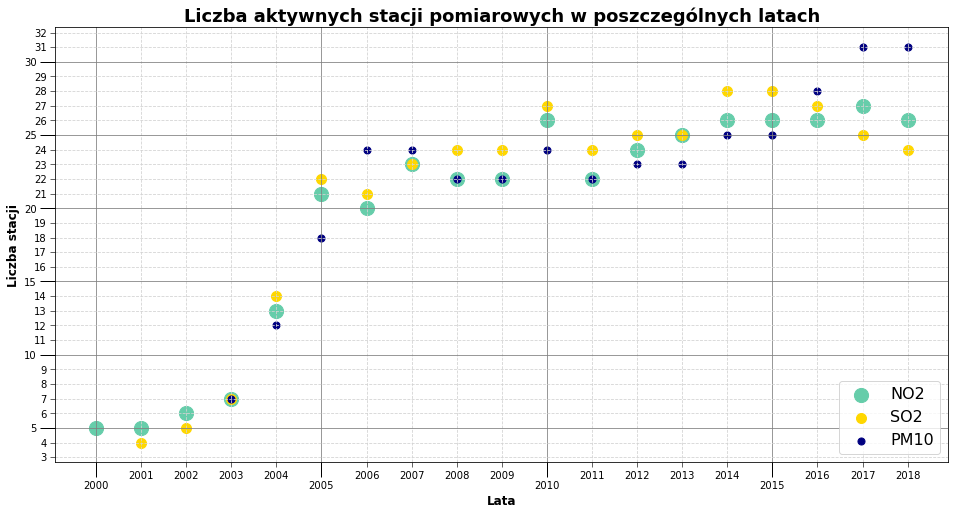

In [17]:
#generate plot
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
from matplotlib import rcParams

# set plot size for all plots that follow
plt.rcParams["figure.figsize"] = (16, 8)

# create the plot space upon which to plot the data
fig, ax = plt.subplots()

# add the x-axis and the y-axis to the plot
NO2 = ax.scatter(Lpom_2000_2018.Rok, Lpom_2000_2018.NO2, color="mediumaquamarine", s=200)
SO2 = ax.scatter(Lpom_2000_2018.Rok, Lpom_2000_2018.SO2, color="gold", s=100)
PM10 = ax.scatter(Lpom_2000_2018.Rok, Lpom_2000_2018.PM10, color="navy", s=50)

# set plot title
ax.set(title="Liczba aktywnych stacji pomiarowych w poszczególnych latach")
plt.rcParams['axes.titleweight'] = 'bold'
ax.title.set_size(18)

# add labels to the axes
ax.set(xlabel="Lata", ylabel="Liczba stacji")
ax.xaxis.label.set_size(12)
ax.xaxis.label.set_fontweight('bold')
ax.yaxis.label.set_size(12)
ax.yaxis.label.set_fontweight('bold')


#set two kinds of 'ticks' on the plot
plt.minorticks_on()
locMajx = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locMajx)
#locMinx = plticker.MultipleLocator(base=1.0) 
#ax.xaxis.set_minor_locator(locMinx)

ax.xaxis.set_minor_locator(AutoMinorLocator())

locMajy = plticker.MultipleLocator(base=5.0) 
ax.yaxis.set_major_locator(locMajy)
locMiny = plticker.MultipleLocator(base=1.0)
ax.yaxis.set_minor_locator(locMiny)

#ax.set_major_locator(plt.MultipleLocator(5))
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='lightgrey', linestyle='--')

#setting labels for the auxiliary grid
ax.yaxis.set_minor_formatter(FormatStrFormatter('%d'))
xminor = ["2001", "2002", "2003", "2004", "2006", "2007", "2008", "2009", 
          "2011", "2012", "2013", "2014", "2016", "2017", "2018"]
ax.xaxis.set_minor_formatter(plticker.FixedFormatter(xminor))

#ax.minor_locator.set_xticklabels(Lpom_2000_2018.Rok, rotation=0)

#setting the thickness and length of the ticks
ax.tick_params(which='major', length = 15, width = 1)
ax.tick_params(which='minor', length = 5)

#legend
ax.legend((NO2, SO2, PM10), ('NO2', 'SO2', 'PM10'))
plt.rcParams["legend.loc"]='lower right'
params = {'legend.fontsize': 16,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.rcParams["legend.markerscale"]=1.0

#save plot
os.chdir(r'D:/DZEJNUS/NAUKA_20/Powietrze_GZM_i_okolice/python_wykresy')
plt.savefig('LiczbaAktywnychStacji_GZMbufor_2000_2018.png', bbox_inches="tight")